<h3> Self Implementing Linear Regression Ordinary Least Squares </h3>

In [22]:
import numpy as np
import pandas as pd

data = pd.read_csv("../Datasets/Advertising.csv")
data['Total_Spend'] = data['TV'] + data['newspaper'] + data['radio']

In [23]:
class OLS :
    _coef = None
    def __init__(self):
        pass

    def fit(self , X , y):
        # np.polyfit gives us the b1 and b0 coeffs from equation : y = b0 + b1 * x
        self._coef = np.polyfit(X , y , deg=1)
        return self._coef

    def predict(self , X):
        return self._coef[0] * X + self._coef[1]

In [31]:
X = data['Total_Spend']
y = data['sales']

In [43]:
model = OLS()
model.fit(X , y)

array([0.04868788, 4.24302822])

In [34]:
predictions = model.predict(X)
predictions

0      20.655712
1      10.518896
2      10.689303
3      16.478292
4      16.414998
         ...    
195     6.954943
196     9.462369
197    13.625183
198    23.318939
199    16.385785
Name: Total_Spend, Length: 200, dtype: float64

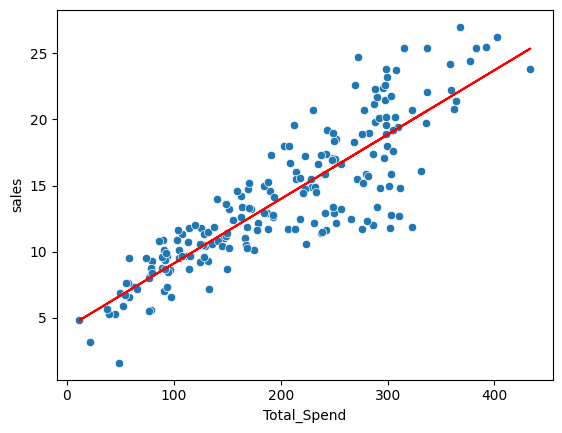

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Total_Spend' , y='sales' , data=data)
plt.plot(X , predictions , color='red')

In [38]:
# Mean Square Error 
Error = 1/len(X) * sum(y - predictions)**2
Error

4.023585047079771e-27

The Goal is to minimize this error with minimizing the b0 and b1 coefficients


In [ ]:
""" Loss function following the formula of Mean Squared Error that tells us how
much we are off / far from correct predictions... """

def loss_function(m , b , datapoints):
    
    total_error = 0

    for i in range(len(datapoints)):
        x = datapoints.iloc[i].Total_Spend
        y = datapoints.iloc[i].sales
        total_error += (y - (m * x + b))**2

    return total_error / len(datapoints)

In [59]:

""" 
 - 'L' here is a rate of descent , how larger the steps we take 
 ( larger the steps faster optimization but small steps arrive at better optimization)
 
 - gradients here are the direction of steepest descent
 
"""
def gradient_descent(m_now , b_now , datapoints , L):

    n = len(datapoints)
    m_gradient = 0
    b_gradient = 0

    for i in range(n):
        x = datapoints.iloc[i].Total_Spend
        y = datapoints.iloc[i].sales

        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) *  (y - (m_now * x + b_now))

    m = m_now - (m_gradient * L)
    b = b_now - (b_gradient * L)

    return m , b


In [60]:
epochs = 1000
m = 0
b = 0

for i in range(epochs):
    m , b = gradient_descent(m , b , data , 0.001)

print(m , b)

C:\Users\mohit\AppData\Local\Temp\ipykernel_15732\67374767.py:18: RuntimeWarning: overflow encountered in scalar add
  m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
C:\Users\mohit\AppData\Local\Temp\ipykernel_15732\67374767.py:21: RuntimeWarning: invalid value encountered in scalar subtract
  m = m_now - (m_gradient * L)


nan nan


In [61]:
model._coef = m , b

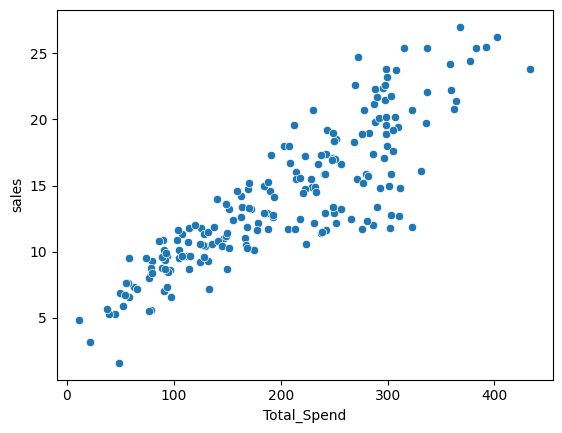

In [62]:
sns.scatterplot(x='Total_Spend' , y='sales' , data=data)
plt.plot(X , model.predict(X) , color='red')